**a)** Code for setting up the design matrix using a fifth-order polynomial and splitting.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Given dataset
np.random.seed()
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Create the design matrix X
X = np.zeros((n, 6))

#Fill the matrix
X[:, 0] = 1.0
X[:, 1] = x.flatten()
X[:, 2] = (x**2).flatten()
X[:, 3] = (x**3).flatten()
X[:, 4] = (x**4).flatten()
X[:, 5] = (x**5).flatten()

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**b)** Computing the optimal parameters using the analytical expressions and then computing the MSE for the train and test sets.

Train MSE:  0.02094194381586506
Test MSE:  0.027249036613035904


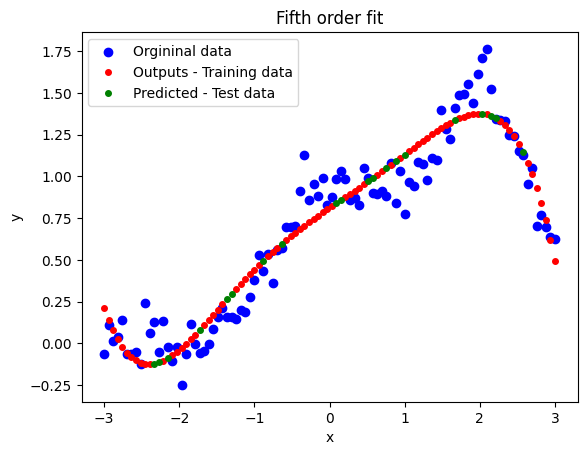

In [62]:
#Analytical OLS fitting values

betas = (np.linalg.inv(X_train.T @ X_train) @ X_train.T ) @ y_train

#Make predictions
y_tilde_train = X_train @ betas
y_tilde_test = X_test @ betas

#Use built-in MSE score
from sklearn.metrics import mean_squared_error

print("Train MSE: ", mean_squared_error(y_train, y_tilde_train))
print("Test MSE: ", mean_squared_error(y_test, y_tilde_test))

#Plotting
x_train = X_train[:, 1]
x_test = X_test[:, 1]
plt.scatter(x, y, color='blue', label='Orgininal data')
plt.plot(x_train, y_tilde_train, "ro", ms=4, label='Outputs - Training data')
plt.plot(x_test, y_tilde_test, "go", ms=4, label="Predicted - Test data")
plt.title("Fifth order fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**c)** Find the optimal parameters by adding more complexity to the model

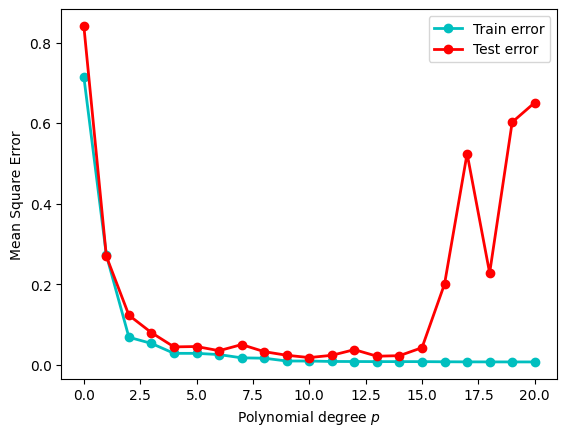

In [89]:
#Dataset
np.random.seed(12)
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Define errors
MSE_train = []
MSE_test = []

for p in range(0,21):

  #Create the design matrix X
  X_train = np.zeros((len(x_train), p))
  X_test = np.zeros((len(x_test),p))

  #Fill the matrix
  for k in range(p):
    X_train[:, k] = (x_train**k).flatten()
    X_test[:, k] = (x_test**k).flatten()

  #Optimal values
  betas = (np.linalg.inv(X_train.T @ X_train) @ X_train.T ) @ y_train

  #Make predictions
  y_tilde_train = X_train @ betas
  y_tilde_test = X_test @ betas

  MSE_train.append(mean_squared_error(y_train, y_tilde_train))
  MSE_test.append(mean_squared_error(y_test, y_tilde_test))


#Plotting
plt.plot(MSE_train, "co-", lw=2, label="Train error")
plt.plot(MSE_test, "ro-", lw=2, label="Test error")
plt.xlabel("Polynomial degree $p$")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show()


We can observe that for small values of the degree of the polynomial the train and test error is large. As the complexity increases both decrease up to a certain point, where the training error continues to decrease and the test error starts to increase again, similar to what happens with Figure 2.11 of Hastie et al.


However, this occurs for specific values of the seed that dictate the normal noise of the dataset, for this reason a fixed seed value has been chosen. In some other cases it is observed that both errors decrease equally as the complexity of the model increases or it also happens that the test error increases sharply above a certain degree of the polynomial.

It should also be noted that a scale of 0 to 15 in p was not sufficient to see the expected behavior, so the range was increased to 20th-order polynomial fits.




## Refs

For the first 2 parts of the code, the same line of work was followed as presented in the lecture notes https://compphysics.github.io/MachineLearning/doc/pub/week35/ipynb/week35.ipynb

For the last part it was taken the theory of the book *The Elements of Statistical Learning* by Hastie et al.